In [1]:
#set csv file to be read and cleaned
import pandas as pd

weather = pd.read_csv("weather_2.csv", index_col="DATE")

In [2]:
weather

,STATION,NAME,ACSH,AWND,FMTM,PGTM,PRCP,PSUN,SNOW,SNWD,...,WT01,WT02,WT05,WT07,WT08,WT09,WT13,WT16,WT18,WT19
DATE,,,,,,,,,,,,,,,,,,,,,
1970-01-01,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",10.0,NaN,NaN,NaN,0.0,81.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-02,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",0.0,NaN,NaN,NaN,0.0,99.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-03,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",40.0,NaN,NaN,NaN,0.0,97.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-04,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",20.0,NaN,NaN,NaN,0.0,97.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-05,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",40.0,NaN,NaN,NaN,0.0,89.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-17,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",NaN,2.01,NaN,NaN,0.0,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
2023-05-18,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",NaN,1.79,NaN,NaN,0.0,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
2023-05-19,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",NaN,1.12,NaN,1801.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#find the percentage of null values in each column to clean up the dataset
null_pct = weather.apply(pd.isnull).sum()/weather.shape[0]
null_pct

STATION    0.000000
NAME       0.000000
ACSH       0.853275
AWND       0.554746
FMTM       0.769065
PGTM       0.778142
PRCP       0.000000
PSUN       0.860557
SNOW       0.719063
SNWD       0.725371
TAVG       0.863480
TMAX       0.000000
TMIN       0.000000
TSUN       0.805939
WDF2       0.555054
WDF5       0.560695
WDFM       0.852967
WESD       0.999436
WSF2       0.554593
WSF5       0.559824
WSFM       0.852967
WT01       0.848351
WT02       0.990666
WT05       0.994461
WT07       0.976306
WT08       0.776860
WT09       0.998974
WT13       0.899482
WT16       0.966716
WT18       0.999949
WT19       0.999949
dtype: float64

In [4]:
#only keep columns where null value is less than 5%
valid_columns = weather.columns[null_pct < .05]

In [5]:
valid_columns

Index(['STATION', 'NAME', 'PRCP', 'TMAX', 'TMIN'], dtype='object')

In [6]:
#index dataframe with only valid colums - removes copy error
weather = weather[valid_columns].copy()

In [7]:
#set everything to lowercase
weather.columns = weather.columns.str.lower()

In [8]:
weather

,station,name,prcp,tmax,tmin
DATE,,,,,
1970-01-01,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",0.0,65,42
1970-01-02,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",0.0,64,40
1970-01-03,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",0.0,67,40
1970-01-04,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",0.0,61,39
1970-01-05,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",0.0,64,42
...,...,...,...,...,...
2023-05-17,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",0.0,72,58
2023-05-18,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",0.0,74,60
2023-05-19,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",0.0,68,61


In [9]:
#finds missing value and fills it with the last non missing value
weather = weather.ffill()

In [10]:
weather.dtypes


station     object
name        object
prcp       float64
tmax         int64
tmin         int64
dtype: object

In [11]:
weather.index

Index(['1970-01-01', '1970-01-02', '1970-01-03', '1970-01-04', '1970-01-05',
       '1970-01-06', '1970-01-07', '1970-01-08', '1970-01-09', '1970-01-10',
       ...
       '2023-05-12', '2023-05-13', '2023-05-14', '2023-05-15', '2023-05-16',
       '2023-05-17', '2023-05-18', '2023-05-19', '2023-05-20', '2023-05-21'],
      dtype='object', name='DATE', length=19499)

In [12]:
weather.apply(pd.isnull).sum()

station    0
name       0
prcp       0
tmax       0
tmin       0
dtype: int64

In [13]:
weather.apply(lambda x: (x == 9999).sum())

station    0
name       0
prcp       0
tmax       0
tmin       0
dtype: int64

In [14]:
weather.dtypes

station     object
name        object
prcp       float64
tmax         int64
tmin         int64
dtype: object

In [15]:
weather.index

Index(['1970-01-01', '1970-01-02', '1970-01-03', '1970-01-04', '1970-01-05',
       '1970-01-06', '1970-01-07', '1970-01-08', '1970-01-09', '1970-01-10',
       ...
       '2023-05-12', '2023-05-13', '2023-05-14', '2023-05-15', '2023-05-16',
       '2023-05-17', '2023-05-18', '2023-05-19', '2023-05-20', '2023-05-21'],
      dtype='object', name='DATE', length=19499)

In [16]:
#converts date from object into datetime
weather.index = pd.to_datetime(weather.index)

In [17]:
weather.index.year


Index([1970, 1970, 1970, 1970, 1970, 1970, 1970, 1970, 1970, 1970,
       ...
       2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023],
      dtype='int32', name='DATE', length=19499)

In [18]:
#sorts the years in order and the number of days per year
weather.index.year.value_counts().sort_index()

DATE
1970    365
1971    365
1972    366
1973    365
1974    365
1975    365
1976    366
1977    365
1978    365
1979    365
1980    366
1981    365
1982    365
1983    365
1984    366
1985    365
1986    365
1987    365
1988    366
1989    365
1990    365
1991    365
1992    366
1993    365
1994    365
1995    365
1996    366
1997    365
1998    365
1999    365
2000    366
2001    365
2002    365
2003    365
2004    366
2005    365
2006    365
2007    365
2008    366
2009    365
2010    365
2011    365
2012    366
2013    365
2014    365
2015    365
2016    366
2017    365
2018    365
2019    365
2020    366
2021    365
2022    365
2023    141
Name: count, dtype: int64

<Axes: xlabel='DATE'>

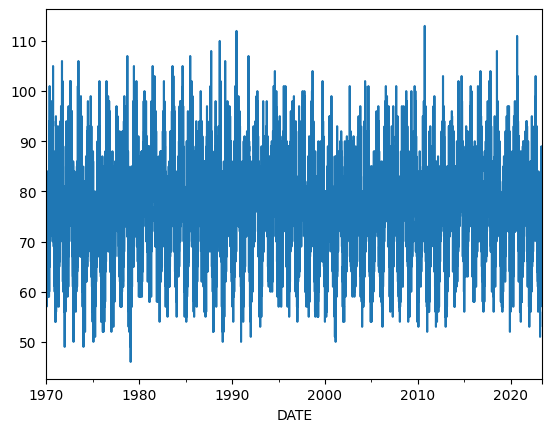

In [19]:
#creates a barplot for theh values in mentioned column
weather["tmax"].plot()

In [20]:
#setting target to train ML model on
weather["target"] = weather.shift(-1)["tmax"] #shifts the tmax one index back and puts it in target

In [21]:
weather

,station,name,prcp,tmax,tmin,target
DATE,,,,,,
1970-01-01,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",0.0,65,42,64.0
1970-01-02,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",0.0,64,40,67.0
1970-01-03,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",0.0,67,40,61.0
1970-01-04,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",0.0,61,39,64.0
1970-01-05,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",0.0,64,42,69.0
...,...,...,...,...,...,...
2023-05-17,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",0.0,72,58,74.0
2023-05-18,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",0.0,74,60,68.0
2023-05-19,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",0.0,68,61,74.0


In [22]:
#remove current day target weather from NaN
weather = weather.ffill()

In [23]:
weather

,station,name,prcp,tmax,tmin,target
DATE,,,,,,
1970-01-01,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",0.0,65,42,64.0
1970-01-02,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",0.0,64,40,67.0
1970-01-03,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",0.0,67,40,61.0
1970-01-04,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",0.0,61,39,64.0
1970-01-05,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",0.0,64,42,69.0
...,...,...,...,...,...,...
2023-05-17,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",0.0,72,58,74.0
2023-05-18,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",0.0,74,60,68.0
2023-05-19,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",0.0,68,61,74.0


In [24]:
#applying ridge regression model - adjusts for colinearity
from sklearn.linear_model import Ridge

rr = Ridge(alpha=.1)#how much coeffcients are shurnk to account for colinearity

In [25]:
#take all the columns as predictors except target, name, and station
predictors = weather.columns[~weather.columns.isin(["target", "name", "station"])]

In [26]:
#have  to test with past data to predict future data and not vise versa
def backtest(weather, model, predictors, start=3650, step=90):
    all_predictions = [] #dataframe that has prediction for 90 days
    
    #train on every row before current row and makes predictions on the next 90 days
    for i in range(start,weather.shape[0], step):
        train = weather.iloc[:i,:]
        test = weather.iloc[i:(i+step),:] 
        
        #fit predictors to regression
        model.fit(train[predictors], train["target"])
        
        #easier to work with pd series than numpy array
        preds = model.predict(test[predictors])
        preds = pd.Series(preds, index=test.index)
        
        #conbine test data with predicted data
        combined = pd.concat([test["target"], preds], axis=1)
        combined.columns = ["actual", "prediction"]
        combined["diff"] = (combined["prediction"] - combined["actual"]).abs()
        
        all_predictions.append(combined)
    return pd.concat(all_predictions)

In [27]:
predictions = backtest(weather, rr, predictors)

In [28]:
predictions

,actual,prediction,diff
DATE,,,
1979-12-30,73.0,71.199216,1.800784
1979-12-31,77.0,73.470062,3.529938
1980-01-01,81.0,76.342443,4.657557
1980-01-02,78.0,79.334060,1.334060
1980-01-03,75.0,77.239393,2.239393
...,...,...,...
2023-05-17,74.0,72.881492,1.118508
2023-05-18,68.0,74.675790,6.675790
2023-05-19,74.0,70.122217,3.877783


In [29]:
#takes diff column and find the average
from sklearn.metrics import mean_absolute_error, mean_squared_error
mean_absolute_error(predictions["actual"], predictions["prediction"])

3.626300431016256

In [30]:
predictions.sort_values("diff", ascending=False)

,actual,prediction,diff
DATE,,,
1999-09-28,102.0,79.700976,22.299024
2018-07-05,108.0,85.923463,22.076537
1990-06-25,112.0,90.161542,21.838458
2007-03-10,92.0,70.332679,21.667321
1995-02-20,70.0,91.385816,21.385816
...,...,...,...
2009-06-23,77.0,76.998044,0.001956
1989-07-10,80.0,80.001659,0.001659
1989-07-09,80.0,80.001659,0.001659


In [31]:
pd.Series(rr.coef_, index=predictors)

prcp   -0.561748
tmax    0.778675
tmin    0.118475
dtype: float64

In [32]:
#percentage difference
def pct_diff(old, new):
    return (new - old) / old

#rolling average
def compute_rolling(weather, horizon, col):
    label = f"rolling_{horizon}_{col}"
    weather[label] = weather[col].rolling(horizon).mean()
    weather[f"{label}_pct"] = pct_diff(weather[label], weather[col])
    return weather
#rolling averages for 3 days and then 14 days 
rolling_horizons = [3, 14]
for horizon in rolling_horizons:
    for col in ["tmax", "tmin", "prcp"]:
        weather = compute_rolling(weather, horizon, col)

In [33]:
weather


,station,name,prcp,tmax,tmin,target,rolling_3_tmax,rolling_3_tmax_pct,rolling_3_tmin,rolling_3_tmin_pct,rolling_3_prcp,rolling_3_prcp_pct,rolling_14_tmax,rolling_14_tmax_pct,rolling_14_tmin,rolling_14_tmin_pct,rolling_14_prcp,rolling_14_prcp_pct
DATE,,,,,,,,,,,,,,,,,,
1970-01-01,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",0.0,65,42,64.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-02,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",0.0,64,40,67.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-03,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",0.0,67,40,61.0,65.333333,0.025510,40.666667,-0.016393,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-04,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",0.0,61,39,64.0,64.000000,-0.046875,39.666667,-0.016807,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-05,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",0.0,64,42,69.0,64.000000,0.000000,40.333333,0.041322,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-17,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",0.0,72,58,74.0,72.000000,0.000000,59.000000,-0.016949,0.0,NaN,70.642857,0.019211,56.785714,0.021384,0.033571,-1.0
2023-05-18,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",0.0,74,60,68.0,73.000000,0.013699,58.666667,0.022727,0.0,NaN,71.214286,0.039117,57.357143,0.046077,0.000000,NaN
2023-05-19,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",0.0,68,61,74.0,71.333333,-0.046729,59.666667,0.022346,0.0,NaN,71.285714,-0.046092,57.714286,0.056931,0.000000,NaN


In [34]:
#looks at every row before a row and returns a mean - for every row
def expand_mean(df):
    return df.expanding(1).mean()

#groups data by month/day and finds mean for every date with the value of previous dates
for col in ["tmax", "tmin", "prcp"]:
    weather[f"month_avg_{col}"] = weather[col].groupby(weather.index.month, group_keys=False).apply(expand_mean)
    weather[f"day_avg_{col}"] = weather[col].groupby(weather.index.day_of_year, group_keys=False).apply(expand_mean)

In [35]:
#remove first 14 rows with missing values - percent missing values also removed
weather = weather.iloc[14:,:]
weather = weather.fillna(0)

In [36]:
weather


,station,name,prcp,tmax,tmin,target,rolling_3_tmax,rolling_3_tmax_pct,rolling_3_tmin,rolling_3_tmin_pct,...,rolling_14_tmin,rolling_14_tmin_pct,rolling_14_prcp,rolling_14_prcp_pct,month_avg_tmax,day_avg_tmax,month_avg_tmin,day_avg_tmin,month_avg_prcp,day_avg_prcp
DATE,,,,,,,,,,,,,,,,,,,,,
1970-01-15,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",0.07,64,56,60.0,62.000000,0.032258,55.666667,0.005988,...,48.142857,0.163205,0.067143,0.042553,64.200000,64.000000,47.733333,56.000000,0.062667,0.070000
1970-01-16,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",0.65,60,56,67.0,60.666667,-0.010989,56.000000,0.000000,...,49.285714,0.136232,0.113571,4.723270,63.937500,60.000000,48.250000,56.000000,0.099375,0.650000
1970-01-17,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",0.00,67,56,65.0,63.666667,0.052356,56.000000,0.000000,...,50.428571,0.110482,0.113571,-1.000000,64.117647,67.000000,48.705882,56.000000,0.093529,0.000000
1970-01-18,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",0.00,65,52,65.0,64.000000,0.015625,54.666667,-0.048780,...,51.357143,0.012517,0.113571,-1.000000,64.166667,65.000000,48.888889,52.000000,0.088333,0.000000
1970-01-19,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",0.00,65,55,67.0,65.666667,-0.010152,54.333333,0.012270,...,52.285714,0.051913,0.113571,-1.000000,64.210526,65.000000,49.210526,55.000000,0.083684,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-17,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",0.00,72,58,74.0,72.000000,0.000000,59.000000,-0.016949,...,56.785714,0.021384,0.033571,-1.000000,74.388554,75.240741,58.453614,58.703704,0.009373,0.005000
2023-05-18,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",0.00,74,60,68.0,73.000000,0.013699,58.666667,0.022727,...,57.357143,0.046077,0.000000,0.000000,74.388320,74.907407,58.454545,58.962963,0.009368,0.003889
2023-05-19,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",0.00,68,61,74.0,71.333333,-0.046729,59.666667,0.022346,...,57.714286,0.056931,0.000000,0.000000,74.384477,74.370370,58.456077,58.851852,0.009362,0.006481


In [37]:
#add new columns to the predictors dataframe
predictors = weather.columns[~weather.columns.isin(["target", "name", "station"])]


In [38]:
#check new mean absolute error
predictions = backtest(weather, rr, predictors)
mean_absolute_error(predictions["actual"], predictions["prediction"])

3.5141029080347908

In [39]:
#mean squared error as a seperate error check
mean_squared_error(predictions["actual"], predictions["prediction"])

21.566471250181106

In [40]:
#decending order
predictions.sort_values("diff", ascending=False)

,actual,prediction,diff
DATE,,,
1990-06-25,112.0,89.892746,22.107254
1988-03-23,94.0,72.511176,21.488824
2007-03-10,92.0,70.590106,21.409894
1999-09-28,102.0,81.405412,20.594588
2018-07-05,108.0,87.667089,20.332911
...,...,...,...
1992-04-13,74.0,74.001527,0.001527
1986-08-05,84.0,83.998477,0.001523
2016-10-07,90.0,89.998536,0.001464


In [41]:
#look up specific datess
weather.loc["1990-03-07": "1990-03-17"]

,station,name,prcp,tmax,tmin,target,rolling_3_tmax,rolling_3_tmax_pct,rolling_3_tmin,rolling_3_tmin_pct,...,rolling_14_tmin,rolling_14_tmin_pct,rolling_14_prcp,rolling_14_prcp_pct,month_avg_tmax,day_avg_tmax,month_avg_tmin,day_avg_tmin,month_avg_prcp,day_avg_prcp
DATE,,,,,,,,,,,,,,,,,,,,,
1990-03-07,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",0.00,74,50,66.0,69.000000,0.072464,49.666667,0.006711,...,53.714286,-0.069149,0.001429,-1.000000e+00,69.645933,70.238095,52.185008,52.952381,0.098006,0.099048
1990-03-08,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",0.00,66,51,63.0,69.666667,-0.052632,49.666667,0.026846,...,53.785714,-0.051793,0.001429,-1.000000e+00,69.640127,67.904762,52.183121,52.714286,0.097850,0.170476
1990-03-09,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",0.00,63,55,63.0,67.666667,-0.068966,52.000000,0.057692,...,53.714286,0.023936,0.001429,-1.000000e+00,69.629571,68.714286,52.187599,51.809524,0.097695,0.009524
1990-03-10,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",0.11,63,52,61.0,64.000000,-0.015625,52.666667,-0.012658,...,53.428571,-0.026738,0.009286,1.084615e+01,69.619048,68.047619,52.187302,52.952381,0.097714,0.065714
1990-03-11,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",0.01,61,50,59.0,62.333333,-0.021390,52.333333,-0.044586,...,52.785714,-0.052774,0.010000,-3.295975e-15,69.605388,67.619048,52.183835,52.047619,0.097575,0.042857
1990-03-12,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",0.03,59,44,63.0,61.000000,-0.032787,48.666667,-0.095890,...,52.000000,-0.153846,0.012143,1.470588e+00,69.588608,68.000000,52.170886,51.142857,0.097468,0.005238
1990-03-13,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",0.00,63,41,67.0,61.000000,0.032787,45.000000,-0.088889,...,51.285714,-0.200557,0.012143,-1.000000e+00,69.578199,67.714286,52.153239,51.047619,0.097314,0.081905
1990-03-14,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",0.00,67,46,79.0,63.000000,0.063492,43.666667,0.053435,...,50.714286,-0.092958,0.012143,-1.000000e+00,69.574132,68.809524,52.143533,51.047619,0.097161,0.029048
1990-03-15,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",0.00,79,49,81.0,69.666667,0.133971,45.333333,0.080882,...,50.357143,-0.026950,0.012143,-1.000000e+00,69.588976,71.190476,52.138583,51.095238,0.097008,0.060952


<Axes: xlabel='diff'>

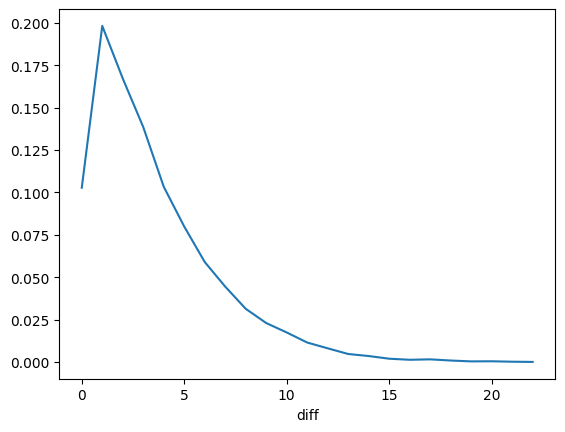

In [42]:
#creates a plot for where the different errors occured
(predictions["diff"].round().value_counts().sort_index() / predictions.shape[0]).plot()

In [43]:
predictions

,actual,prediction,diff
DATE,,,
1980-01-13,66.0,64.285118,1.714882
1980-01-14,67.0,66.881295,0.118705
1980-01-15,64.0,68.069038,4.069038
1980-01-16,63.0,65.938339,2.938339
1980-01-17,63.0,64.900613,1.900613
...,...,...,...
2023-05-17,74.0,73.218577,0.781423
2023-05-18,68.0,74.521729,6.521729
2023-05-19,74.0,69.495067,4.504933
